In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
import keras

In [4]:
print(tf.__version__)
print(keras.__version__)

1.14.0
2.2.4


In [8]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
#% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [9]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 102s 1us/step


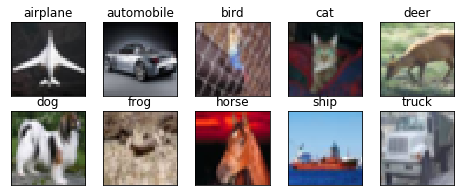

In [10]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [11]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [12]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [13]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [14]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Con

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 22s 56ms/step - loss: 1.8441 - acc: 0.2988 - val_loss: 1.4669 - val_acc: 0.4529
Epoch 2/50
390/390 [==============================] - 10s 25ms/step - loss: 1.3273 - acc: 0.5181 - val_loss: 1.1931 - val_acc: 0.5711
Epoch 3/50
390/390 [==============================] - 9s 24ms/step - loss: 1.1218 - acc: 0.6028 - val_loss: 0.9504 - val_acc: 0.6637
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9842 - acc: 0.6572 - val_loss: 0.8685 - val_acc: 0.6981
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8894 - acc: 0.6900 - val_loss: 0.7888 - val_acc: 0.7241
Epoch 6/50
390/390 [==============================] - 9s 24ms/step - loss: 0.8158 - acc: 0.7190 - val_loss: 0.7469 - val_acc: 0.7480
Epoch 7/50
390/390 [==============================] - 9s 24ms/step - loss: 0.7631 - acc: 0.7374 - val_loss: 0.6858 - val_acc: 0.7681
Epoch 8/50
390/390 [==============================] - 9s 24ms/step 

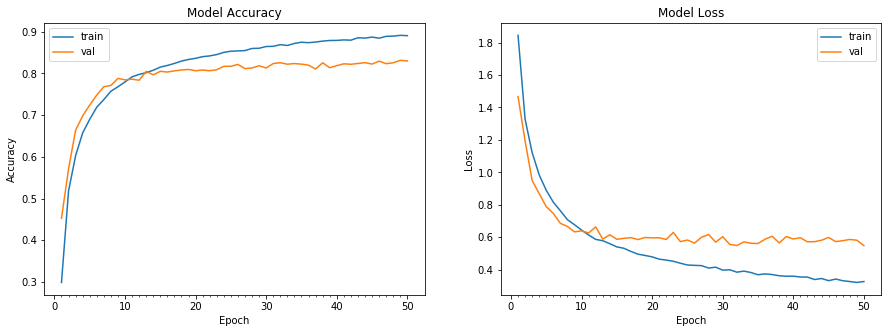

Accuracy on test data is: 82.98


In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## The last epoch validation accuracy is 0.8233.
## The task here is to beat the last epoch accuracy by using only depthwise separable convolutions , within 100k parameters and 50 epochs.

In [17]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D

In [18]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 100, kernel_size = 3, depth_multiplier = 1, input_shape=(32, 32, 3))) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 100)       427       
Total params: 427
Trainable params: 427
Non-trainable params: 0
_________________________________________________________________


### Keras DepthwiseConv2d

In [20]:
from keras.layers.convolutional import DepthwiseConv2D

In [21]:
# Define the model
model = Sequential()
model.add(DepthwiseConv2D( kernel_size = 3, depth_multiplier = 1, input_shape=(32, 32, 3))) # This only performs 3x3x1 operation across all three channels

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_1 (Depthwis (None, 30, 30, 3)         30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


### Two step operation of depthwise separable convolution layers

In [23]:
# Define the model
model = Sequential()
model.add(DepthwiseConv2D( kernel_size = 3, depth_multiplier = 1, input_shape=(32, 32, 3))) # This only performs 3x3x1 operation across all three channels
model.add(Convolution2D(100, (1,1)))                                                                   # This performs pointwise (1x1) convolution operation across all three input channels and generates 100 channels
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_2 (Depthwis (None, 30, 30, 3)         30        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 100)       400       
Total params: 430
Trainable params: 430
Non-trainable params: 0
_________________________________________________________________


### It is clearly evident from above operations to perform depthwise separable convolution, which is inturn two steps; 1.3x3 convolution across all channels foloowed by 2. 1x1 (pointwise convolution). It is better to use Keras SeparableConv2D function instead of DepthwiseConv2D followed by Conv2D

In [25]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


Epoch 1/50
  1/390 [..............................] - ETA: 48s - loss: 0.2430 - acc: 0.9141

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


390/390 [==============================] - 40s 103ms/step - loss: 0.3220 - acc: 0.8847 - val_loss: 0.6445 - val_acc: 0.7940
Epoch 2/50
390/390 [==============================] - 41s 105ms/step - loss: 0.3199 - acc: 0.8856 - val_loss: 0.6901 - val_acc: 0.7795
Epoch 3/50
390/390 [==============================] - 41s 106ms/step - loss: 0.3176 - acc: 0.8884 - val_loss: 0.7053 - val_acc: 0.7786
Epoch 4/50
390/390 [==============================] - 42s 107ms/step - loss: 0.3135 - acc: 0.8884 - val_loss: 0.7257 - val_acc: 0.7743
Epoch 5/50
390/390 [==============================] - 41s 104ms/step - loss: 0.3059 - acc: 0.8912 - val_loss: 0.6676 - val_acc: 0.7846
Epoch 6/50
390/390 [==============================] - 41s 106ms/step - loss: 0.3080 - acc: 0.8882 - val_loss: 0.6628 - val_acc: 0.7897
Epoch 7/50
390/390 [==============================] - 41s 104ms/step - loss: 0.3063 - acc: 0.8926 - val_loss: 0.7107 - val_acc: 0.7786
Epoch 8/50
390/390 [==============================] - 41s 106ms/st

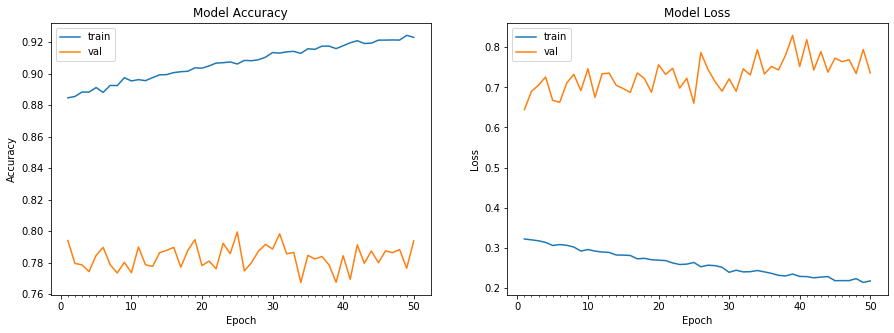

Accuracy on test data is: 79.38


In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### I see a overfitting problem after around 12th epoch.
### May be adding l2 regularizer will improve generalization but very small quantitity.

In [28]:
from keras.regularizers import l1, l2

In [33]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, kernel_regularizer=l2(0.005), activation='relu',  input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.05)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3,  kernel_regularizer=l2(0.005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, kernel_regularizer=l2(0.005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, kernel_regularizer=l2(0.005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, kernel_regularizer=l2(0.005),  activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, kernel_regularizer=l2(0.005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, kernel_regularizer=l2(0.005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, kernel_regularizer=l2(0.005), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_26 (Separab (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_31 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_36 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_27 (Separab (None, 28, 28, 64)        2400      
_________________________________________________________________
batch_normalization_32 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_37 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
separable_conv2d_28 (Separab (None, 26, 26, 128)       8896      
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 42s 109ms/step - loss: 1.9277 - acc: 0.2952 - val_loss: 1.6808 - val_acc: 0.4074
Epoch 2/50
390/390 [==============================] - 39s 100ms/step - loss: 1.4554 - acc: 0.4757 - val_loss: 1.4050 - val_acc: 0.5171
Epoch 3/50
390/390 [==============================] - 39s 101ms/step - loss: 1.2372 - acc: 0.5608 - val_loss: 1.1967 - val_acc: 0.5806
Epoch 4/50
390/390 [==============================] - 39s 101ms/step - loss: 1.1028 - acc: 0.6103 - val_loss: 1.0722 - val_acc: 0.6272
Epoch 5/50
390/390 [==============================] - 40s 102ms/step - loss: 1.0103 - acc: 0.6453 - val_loss: 1.0204 - val_acc: 0.6421
Epoch 6/50
390/390 [==============================] - 39s 101ms/step - loss: 0.9326 - acc: 0.6712 - val_loss: 0.9394 - val_acc: 0.6705
Epoch 7/50
390/390 [==============================] - 40s 103ms/step - loss: 0.8752 - acc: 0.6934 - val_loss: 0.9177 - val_acc: 0.6803
Epoch 8/50
390/390 [==============================] - 4

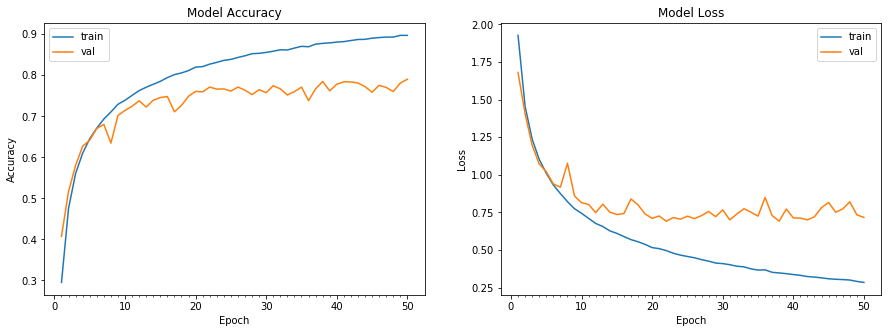

Accuracy on test data is: 79.04


In [35]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Trying Learning rate scheduler with the base model. Back to basics

In [37]:
# Implementing polyno,yial rate scheduler
NUM_EPOCHS = 50
INIT_LR = 5e-3
def poly_decay(epoch):
    maxEpochs = NUM_EPOCHS
    baseLR = INIT_LR
    power = 1.0
    alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
    return alpha

In [40]:
from keras.callbacks import LearningRateScheduler
callbacks = [LearningRateScheduler(poly_decay)]

In [41]:
from keras.optimizers import SGD, Adam

In [43]:
opt = SGD(lr=INIT_LR, momentum=0.9)


In [44]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 3changed from adam to SGD with momentum

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


In [ ]:
#callbacks=None
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks = callbacks, #Added polynomial rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Replacing SGD with Adam and keeping learning rate scheduler same

In [47]:
opt = Adam(lr=INIT_LR)

In [49]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #changed from SGD to adam with momentum

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50
390/390 [==============================] - 45s 117ms/step - loss: 1.6174 - acc: 0.4085 - val_loss: 2.1886 - val_acc: 0.4251
Epoch 2/50
390/390 [==============================] - 40s 104ms/step - loss: 1.1663 - acc: 0.5860 - val_loss: 1.4217 - val_acc: 0.5441
Epoch 3/50
390/390 [==============================] - 40s 103ms/step - loss: 1.0039 - acc: 0.6444 - val_loss: 1.1519 - val_acc: 0.6343
Epoch 4/50
390/390 [==============================] - 40s 104ms/step - loss: 0.9043 - acc: 0.6785 - val_loss: 0.9236 - val_acc: 0.6747
Epoch 5/50
390/390 [==============================] - 41s 105ms/step - loss: 0.8314 - acc: 0.7062 - val_loss: 0.9201 - val_acc: 0.6885
Epoch 6/50
390/390 [==============================] - 42s 109ms/step - loss: 0.7782 - acc: 0.7267 - val_loss: 0.8754 - val_acc: 0.7003
Epoch 7/50
390/390 [==============================] - 42s 108ms/step - loss: 0.7289 - acc: 0.7460 - val_loss: 0.8848 - val_acc: 0.6975
Epoch 8/50
390/390 [==============================] - 4

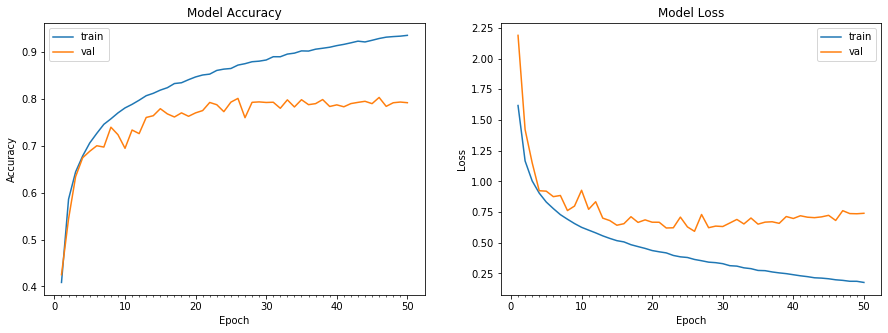

Accuracy on test data is: 79.22


In [50]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks = callbacks, #Added polynomial rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observations
### Adam is better than SGD with momentum


### Changing the polynomial learning rate from 5e-3 to 1e-3
### Also I am reducing my epochs from 50 to 30 for faster experimentation

In [52]:
#1e-3
INIT_LR = 5e-3
NUM_EPOCHS = 50
def poly_decay(epoch):
    maxEpochs = NUM_EPOCHS
    baseLR = INIT_LR
    power = 1.0
    alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
    return alpha
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #changed from SGD to adam with momentum

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=30)`
  del sys.path[0]


Epoch 1/30
390/390 [==============================] - 42s 107ms/step - loss: 1.7664 - acc: 0.3440 - val_loss: 1.9335 - val_acc: 0.3362
Epoch 2/30
390/390 [==============================] - 39s 100ms/step - loss: 1.3332 - acc: 0.5183 - val_loss: 1.3354 - val_acc: 0.5358
Epoch 3/30
390/390 [==============================] - 39s 101ms/step - loss: 1.1108 - acc: 0.6022 - val_loss: 1.2744 - val_acc: 0.5593
Epoch 4/30
390/390 [==============================] - 39s 101ms/step - loss: 0.9815 - acc: 0.6526 - val_loss: 1.1107 - val_acc: 0.6126
Epoch 5/30
390/390 [==============================] - 39s 101ms/step - loss: 0.8902 - acc: 0.6856 - val_loss: 0.9083 - val_acc: 0.6847
Epoch 6/30
390/390 [==============================] - 40s 102ms/step - loss: 0.8240 - acc: 0.7101 - val_loss: 0.8457 - val_acc: 0.7019
Epoch 7/30
390/390 [==============================] - 41s 105ms/step - loss: 0.7706 - acc: 0.7291 - val_loss: 0.8557 - val_acc: 0.7084
Epoch 8/30
390/390 [==============================] - 4

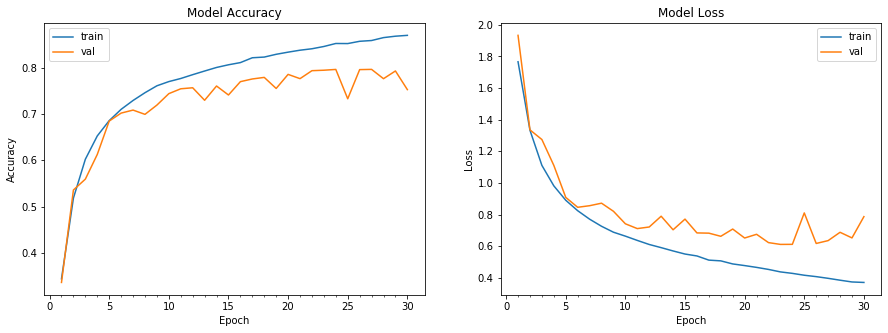

Accuracy on test data is: 75.26


In [53]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 callbacks = callbacks, #Added polynomial rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observations
### No difference when learning rate is increased. Sticking with the old learnig rate

## Adding pointwise convolution after extracting features with 256 filters
### Continuing with Adam opyimizer, dropout=0.1 and polynomial rate scheduler

In [55]:
# Define the model
#1e-3
INIT_LR = 5e-3
NUM_EPOCHS = 50
def poly_decay(epoch):
    maxEpochs = NUM_EPOCHS
    baseLR = INIT_LR
    power = 1.0
    alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
    return alpha
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #changed from SGD to adam with momentum

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=30)`
  del sys.path[0]


Epoch 1/30
390/390 [==============================] - 46s 117ms/step - loss: 1.7543 - acc: 0.3494 - val_loss: 2.1368 - val_acc: 0.3202
Epoch 2/30
390/390 [==============================] - 42s 107ms/step - loss: 1.3763 - acc: 0.5014 - val_loss: 1.3502 - val_acc: 0.5162
Epoch 3/30
390/390 [==============================] - 43s 110ms/step - loss: 1.2191 - acc: 0.5616 - val_loss: 1.4670 - val_acc: 0.4930
Epoch 4/30
390/390 [==============================] - 42s 108ms/step - loss: 1.0984 - acc: 0.6069 - val_loss: 1.3427 - val_acc: 0.5373
Epoch 5/30
390/390 [==============================] - 41s 106ms/step - loss: 0.9986 - acc: 0.6427 - val_loss: 1.2285 - val_acc: 0.5702
Epoch 6/30
390/390 [==============================] - 42s 106ms/step - loss: 0.9225 - acc: 0.6733 - val_loss: 1.1452 - val_acc: 0.5996
Epoch 7/30
390/390 [==============================] - 49s 127ms/step - loss: 0.8665 - acc: 0.6940 - val_loss: 0.9375 - val_acc: 0.6700
Epoch 8/30
390/390 [==============================] - 4

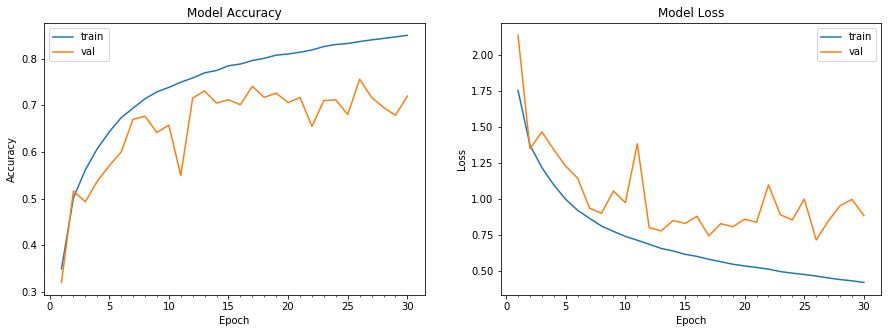

Accuracy on test data is: 71.98


In [56]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 callbacks = callbacks, #Added polynomial rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Looks like pointwise colvolutions are making the learning worse. 
### 


## The reason for padding is I see images are spilling over to edges and I thing padding = 2 is required.

## Startegies
### Use padding in the begining as I see images are in the edges.You beging with higher image size and can maintain more layers.
### Using padding in the first block of convolution layer
### Approach 2. Start with 64 filters go to 512 apply max pool 

In [65]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#### End of Block-1 ##############
model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 4, 4, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #changed from SGD to adam with momentum

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), activation="relu")`


In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_90 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_106 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_111 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_91 (Separab (None, 32, 32, 64)        2400      
_________________________________________________________________
batch_normalization_107 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_112 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_92 (Separab (None, 32, 32, 128)       8896      
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=30)`
  del sys.path[0]


Epoch 1/30
390/390 [==============================] - 48s 123ms/step - loss: 1.6579 - acc: 0.3933 - val_loss: 1.7752 - val_acc: 0.4178
Epoch 2/30
390/390 [==============================] - 41s 104ms/step - loss: 1.2234 - acc: 0.5591 - val_loss: 1.2158 - val_acc: 0.5710
Epoch 3/30
390/390 [==============================] - 41s 104ms/step - loss: 1.0043 - acc: 0.6415 - val_loss: 1.4474 - val_acc: 0.5255
Epoch 4/30
390/390 [==============================] - 41s 104ms/step - loss: 0.8573 - acc: 0.6964 - val_loss: 1.0430 - val_acc: 0.6501
Epoch 5/30
390/390 [==============================] - 41s 106ms/step - loss: 0.7677 - acc: 0.7298 - val_loss: 0.8526 - val_acc: 0.6988
Epoch 6/30
390/390 [==============================] - 42s 107ms/step - loss: 0.7057 - acc: 0.7527 - val_loss: 0.8638 - val_acc: 0.7030
Epoch 7/30
390/390 [==============================] - 42s 108ms/step - loss: 0.6578 - acc: 0.7692 - val_loss: 0.7784 - val_acc: 0.7311
Epoch 8/30
390/390 [==============================] - 4

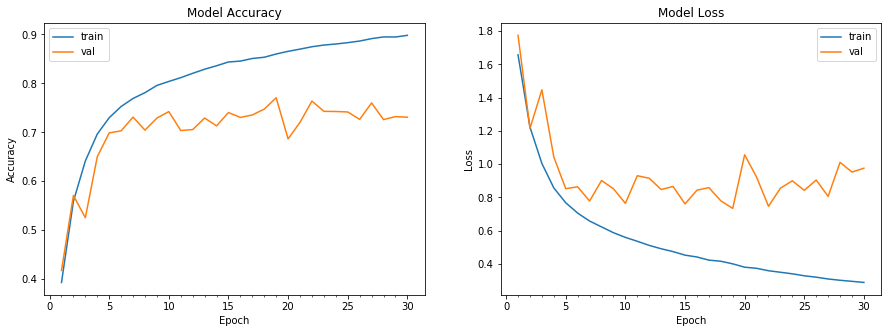

Accuracy on test data is: 73.09


In [67]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 callbacks = callbacks, #Added polynomial rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## I am wondering if my polynomial learning rate is causing the zig zag behavious of validation curves? I am going to go back to the default LR and test for 20 epochs

In [68]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#### End of Block-1 ##############
model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 4, 4, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #changed from SGD to adam with momentum

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), activation="relu")`


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=20)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
390/390 [==============================] - 44s 113ms/step - loss: 1.5599 - acc: 0.4362 - val_loss: 1.3341 - val_acc: 0.5288
Epoch 2/20
390/390 [==============================] - 42s 107ms/step - loss: 1.1214 - acc: 0.6022 - val_loss: 1.4312 - val_acc: 0.5217
Epoch 3/20
390/390 [==============================] - 42s 107ms/step - loss: 0.9334 - acc: 0.6691 - val_loss: 0.9619 - val_acc: 0.6653
Epoch 4/20
390/390 [==============================] - 42s 108ms/step - loss: 0.8254 - acc: 0.7083 - val_loss: 0.9106 - val_acc: 0.6846
Epoch 5/20
390/390 [==============================] - 42s 109ms/step - loss: 0.7505 - acc: 0.7369 - val_loss: 0.8286 - val_acc: 0.7083
Epoch 6/20
390/390 [==============================] - 44s 113ms/step - loss: 0.6912 - acc: 0.7578 - val_loss: 0.7520 - val_acc: 0.7366
Epoch 7/20
390/390 [==============================] - 43s 109ms/step - loss: 0.6485 - acc: 0.7711 - val_loss: 0.8399 - val_acc: 0.7071
Epoch 8/20
390/390 [==============================] - 4

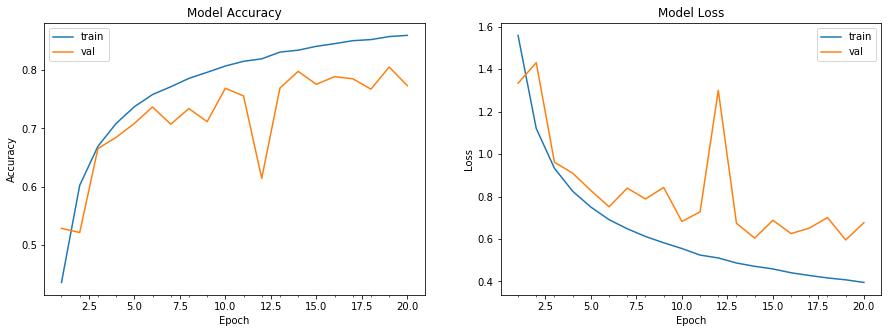

Accuracy on test data is: 77.30


In [70]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observations
### It looks like default LR is giving smoother validation curves. I will stick with the default LR . But before that I want to try with Rohan's LR from Assignment-2.
### Moreover, the max validation accuracy acheived was 0.8049. Except one blip around 11th epoch, the validation LR curve looks smoother.

## Conclusion
## I will continue with defalut LR, batchnorm, padding in Ist conv block, droput (0.1) and 110k parameters

Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  1/390 [..............................] - ETA: 48s - loss: 0.3696 - acc: 0.8750

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=30)`
  from ipykernel import kernelapp as app


390/390 [==============================] - 42s 107ms/step - loss: 0.4255 - acc: 0.8501 - val_loss: 0.7161 - val_acc: 0.7752
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 42s 106ms/step - loss: 0.3885 - acc: 0.8641 - val_loss: 0.6236 - val_acc: 0.7897
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 41s 106ms/step - loss: 0.3526 - acc: 0.8748 - val_loss: 0.6414 - val_acc: 0.7921
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 42s 107ms/step - loss: 0.3277 - acc: 0.8831 - val_loss: 0.5971 - val_acc: 0.8100
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 42s 108ms/step - loss: 0.3087 - acc: 0.8909 - val_loss: 0.5519 - val_acc: 0.8181
Epoch 6/30

Epoch 00006: LearningRat

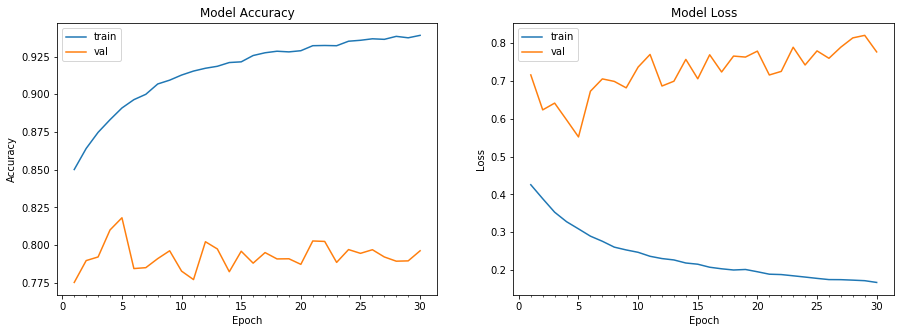

Accuracy on test data is: 79.62


In [72]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observations
### It looks like Rohan's LR is giving smoother validation curves. I will stick with the this LR . 
### Moreover, the max validation accuracy acheived was 0.8189. There are no huge blips in the validation curve. 
### Validation accuracy of .80 was breached at least 6 times in 30 epochs

## Conclusion
## I will continue with Rohan's LR scheduler, batchnorm, padding in Ist conv block, droput (0.1) and 110k parameters

### As padding is working, it may be good strategy to add padding to second convolution block and also increase the layers

### I see a clear improvement in the train and validation accuracy within the first 10 epochs. This is crucial as the the overfitting (it's subjective) is starting after 10 epochs. So if there is a clear improvement in the first 10 epochs , it's possible to acheive >80% validation accuracy

In [73]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 32, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 64, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 256, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 32, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 64, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 128, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_106 (Separa (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_124 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_129 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_107 (Separa (None, 32, 32, 64)        2400      
_________________________________________________________________
batch_normalization_125 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_130 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_108 (Separa (None, 32, 32, 128)       8896      
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=20)`
  from ipykernel import kernelapp as app


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 59s 151ms/step - loss: 1.6513 - acc: 0.4075 - val_loss: 1.8600 - val_acc: 0.4505
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 50s 129ms/step - loss: 1.1311 - acc: 0.5978 - val_loss: 1.1755 - val_acc: 0.6059
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 51s 130ms/step - loss: 0.9157 - acc: 0.6809 - val_loss: 0.8895 - val_acc: 0.7035
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 51s 130ms/step - loss: 0.7995 - acc: 0.7254 - val_loss: 0.8141 - val_acc: 0.7198
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 51s 132ms/step - loss: 0.7181 - acc: 0

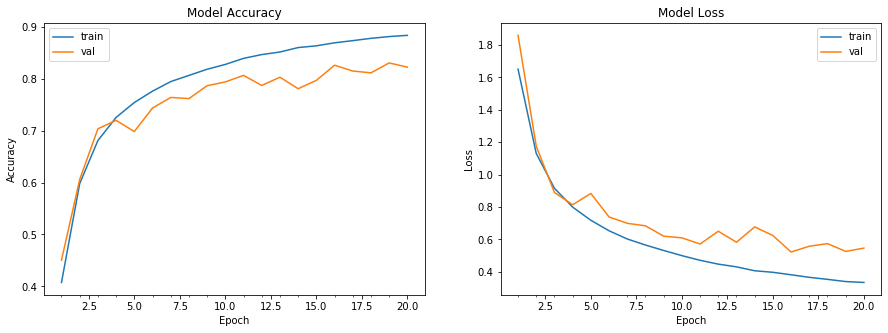

Accuracy on test data is: 82.23


In [75]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Yayyyy. Crossed the 0.8233 in the 16th epoch and 19th epoch is highest with 83.04 validation accuracy.
## Validation curve is much smoother now.

### The only caveat is my parameters are higher by 20k. The task is to tweak the architecture and run again.

In [84]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 220, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 220, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_139 (Separa (None, 32, 32, 28)        139       
_________________________________________________________________
batch_normalization_160 (Bat (None, 32, 32, 28)        112       
_________________________________________________________________
dropout_165 (Dropout)        (None, 32, 32, 28)        0         
_________________________________________________________________
separable_conv2d_140 (Separa (None, 32, 32, 56)        1876      
_________________________________________________________________
batch_normalization_161 (Bat (None, 32, 32, 56)        224       
_________________________________________________________________
dropout_166 (Dropout)        (None, 32, 32, 56)        0         
_________________________________________________________________
separable_conv2d_141 (Separa (None, 32, 32, 112)       6888      
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=40)`
  from ipykernel import kernelapp as app


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 51s 130ms/step - loss: 1.6921 - acc: 0.3781 - val_loss: 1.9697 - val_acc: 0.4228
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 40s 103ms/step - loss: 1.1745 - acc: 0.5842 - val_loss: 1.1463 - val_acc: 0.6213
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 38s 98ms/step - loss: 0.9616 - acc: 0.6625 - val_loss: 0.9145 - val_acc: 0.6773
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 41s 106ms/step - loss: 0.8362 - acc: 0.7088 - val_loss: 0.8981 - val_acc: 0.6946
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 41s 104ms/step - loss: 0.7558 - acc: 0.

Epoch 40/40

Epoch 00040: LearningRateScheduler setting learning rate to 0.0002231977.
390/390 [==============================] - 42s 108ms/step - loss: 0.2802 - acc: 0.9035 - val_loss: 0.5748 - val_acc: 0.8251
Model took 1659.04 seconds to train


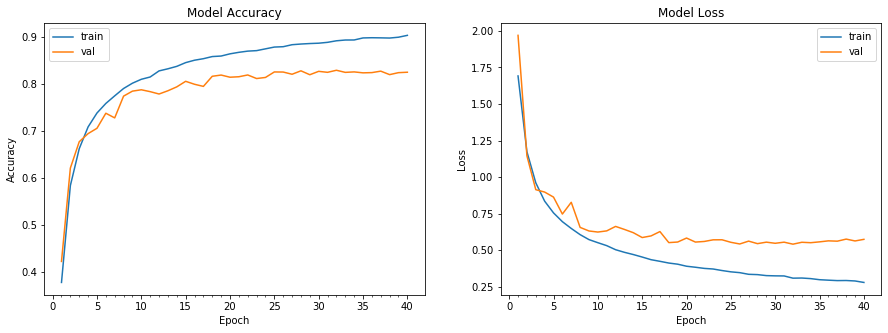

Accuracy on test data is: 82.51


In [82]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 40, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Crossed the 0.8233 in the 25th epoch and 32nd epoch is highest with 82.93 validation accuracy

In [85]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 14, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_161 (Separa (None, 32, 32, 14)        83        
_________________________________________________________________
batch_normalization_184 (Bat (None, 32, 32, 14)        56        
_________________________________________________________________
dropout_189 (Dropout)        (None, 32, 32, 14)        0         
_________________________________________________________________
separable_conv2d_162 (Separa (None, 32, 32, 28)        546       
_________________________________________________________________
batch_normalization_185 (Bat (None, 32, 32, 28)        112       
_________________________________________________________________
dropout_190 (Dropout)        (None, 32, 32, 28)        0         
_________________________________________________________________
separable_conv2d_163 (Separa (None, 32, 32, 56)        1876      
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 52s 134ms/step - loss: 1.7469 - acc: 0.3699 - val_loss: 1.7617 - val_acc: 0.4290
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 43s 110ms/step - loss: 1.1667 - acc: 0.5835 - val_loss: 1.1479 - val_acc: 0.6047
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 42s 108ms/step - loss: 0.9760 - acc: 0.6565 - val_loss: 0.9506 - val_acc: 0.6737
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 41s 105ms/step - loss: 0.8598 - acc: 0.6998 - val_loss: 0.9004 - val_acc: 0.6982
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 41s 106ms/step - loss: 0.7829 - acc: 0

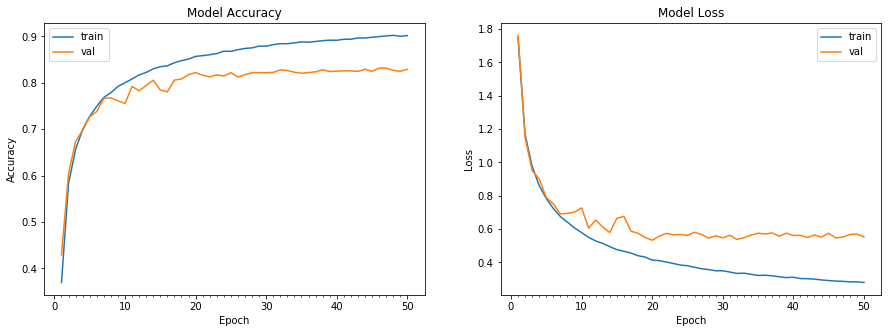

Accuracy on test data is: 82.89


In [87]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Crossed the 0.8233 in the 32nd epoch and 46th epoch is highest with 83.18 validation accuracy

## Increased the dropout rate to 0.2 
### Hyperparameter tuning

In [89]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 14, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.2))



model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 52s 134ms/step - loss: 1.8588 - acc: 0.3212 - val_loss: 1.9428 - val_acc: 0.3606
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 41s 106ms/step - loss: 1.3443 - acc: 0.5184 - val_loss: 1.5024 - val_acc: 0.5048
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 43s 111ms/step - loss: 1.1428 - acc: 0.5931 - val_loss: 1.1616 - val_acc: 0.5917
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 42s 109ms/step - loss: 0.9988 - acc: 0.6499 - val_loss: 0.9939 - val_acc: 0.6560
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 45s 114ms/step - loss: 0.9164 - acc: 0

Epoch 40/50

Epoch 00040: LearningRateScheduler setting learning rate to 0.0002231977.
390/390 [==============================] - 41s 106ms/step - loss: 0.4694 - acc: 0.8395 - val_loss: 0.5843 - val_acc: 0.8047
Epoch 41/50

Epoch 00041: LearningRateScheduler setting learning rate to 0.0002180233.
390/390 [==============================] - 42s 106ms/step - loss: 0.4625 - acc: 0.8413 - val_loss: 0.5967 - val_acc: 0.8016
Epoch 42/50

Epoch 00042: LearningRateScheduler setting learning rate to 0.0002130833.
390/390 [==============================] - 42s 106ms/step - loss: 0.4610 - acc: 0.8406 - val_loss: 0.5891 - val_acc: 0.8057
Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 0.0002083623.
390/390 [==============================] - 42s 107ms/step - loss: 0.4554 - acc: 0.8449 - val_loss: 0.6128 - val_acc: 0.7985
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 0.0002038459.
390/390 [==============================] - 42s 107ms/step - loss: 0.4

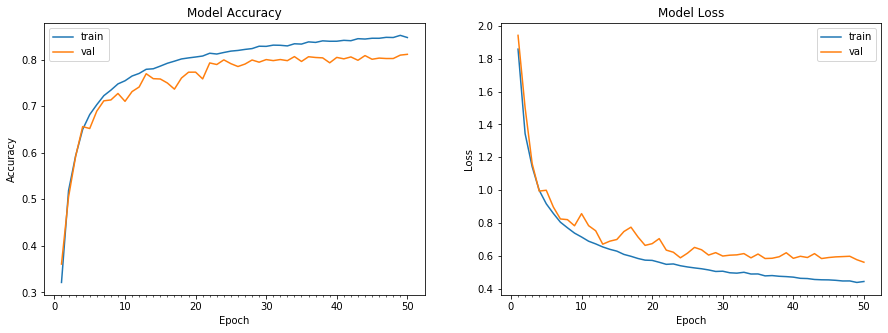

Accuracy on test data is: 81.13


In [90]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## A fun experiment with no droput

In [91]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 14, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
#model.add(Dropout(0.2)) 
model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(Dropout(0.2))



model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 41s 105ms/step - loss: 1.5329 - acc: 0.4492 - val_loss: 2.8225 - val_acc: 0.4570
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 29s 74ms/step - loss: 0.9667 - acc: 0.6599 - val_loss: 1.2376 - val_acc: 0.6256
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 29s 74ms/step - loss: 0.7771 - acc: 0.7287 - val_loss: 1.0491 - val_acc: 0.6719
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 29s 74ms/step - loss: 0.6607 - acc: 0.7705 - val_loss: 0.8565 - val_acc: 0.7222
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 29s 74ms/step - loss: 0.5693 - acc: 0.803

390/390 [==============================] - 29s 74ms/step - loss: 0.0118 - acc: 0.9969 - val_loss: 1.4467 - val_acc: 0.7804
Epoch 41/50

Epoch 00041: LearningRateScheduler setting learning rate to 0.0002180233.
390/390 [==============================] - 30s 76ms/step - loss: 0.0123 - acc: 0.9969 - val_loss: 1.4275 - val_acc: 0.7809
Epoch 42/50

Epoch 00042: LearningRateScheduler setting learning rate to 0.0002130833.
390/390 [==============================] - 28s 72ms/step - loss: 0.0113 - acc: 0.9969 - val_loss: 1.4063 - val_acc: 0.7833
Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 0.0002083623.
390/390 [==============================] - 28s 72ms/step - loss: 0.0112 - acc: 0.9970 - val_loss: 1.4265 - val_acc: 0.7832
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 0.0002038459.
390/390 [==============================] - 28s 72ms/step - loss: 0.0112 - acc: 0.9965 - val_loss: 1.4672 - val_acc: 0.7865
Epoch 45/50

Epoch 00045: LearningRat

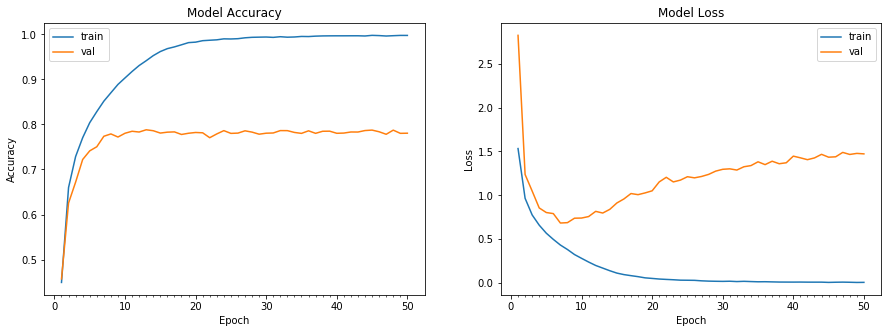

Accuracy on test data is: 78.06


In [92]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Does my model converge faster if I break separableconv2d into two operations and add batchnorm in between

In [99]:
# Define the model
model = Sequential()
model.add(DepthwiseConv2D( kernel_size = 3, padding='same', depth_multiplier = 1, activation='relu', input_shape=(32, 32, 3))) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(14, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

###2nd Con Block #####
model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

### 3rd Conv Block ## No padding here
model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:96: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_19 (Depthwi (None, 32, 32, 3)         30        
_________________________________________________________________
batch_normalization_269 (Bat (None, 32, 32, 3)         12        
_________________________________________________________________
dropout_260 (Dropout)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 32, 32, 14)        56        
_________________________________________________________________
batch_normalization_270 (Bat (None, 32, 32, 14)        56        
_________________________________________________________________
dropout_261 (Dropout)        (None, 32, 32, 14)        0         
_________________________________________________________________
depthwise_conv2d_20 (Depthwi (None, 32, 32, 14)        140       
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 74s 190ms/step - loss: 2.1173 - acc: 0.2078 - val_loss: 2.6161 - val_acc: 0.1739
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 58s 148ms/step - loss: 1.6999 - acc: 0.3764 - val_loss: 2.8727 - val_acc: 0.2030
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 58s 149ms/step - loss: 1.5561 - acc: 0.4320 - val_loss: 2.5609 - val_acc: 0.2476
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 58s 150ms/step - loss: 1.4305 - acc: 0.4803 - val_loss: 2.5663 - val_acc: 0.2350
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 59s 150ms/step - loss: 1.3306 - acc: 0

Epoch 40/50

Epoch 00040: LearningRateScheduler setting learning rate to 0.0002231977.
390/390 [==============================] - 58s 149ms/step - loss: 0.5818 - acc: 0.7977 - val_loss: 0.7743 - val_acc: 0.7409
Epoch 41/50

Epoch 00041: LearningRateScheduler setting learning rate to 0.0002180233.
390/390 [==============================] - 61s 155ms/step - loss: 0.5674 - acc: 0.8022 - val_loss: 0.7394 - val_acc: 0.7516
Epoch 42/50

Epoch 00042: LearningRateScheduler setting learning rate to 0.0002130833.
390/390 [==============================] - 62s 158ms/step - loss: 0.5645 - acc: 0.8015 - val_loss: 0.7585 - val_acc: 0.7497
Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 0.0002083623.
390/390 [==============================] - 65s 168ms/step - loss: 0.5606 - acc: 0.8053 - val_loss: 0.7061 - val_acc: 0.7566
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 0.0002038459.
390/390 [==============================] - 68s 175ms/step - loss: 0.5

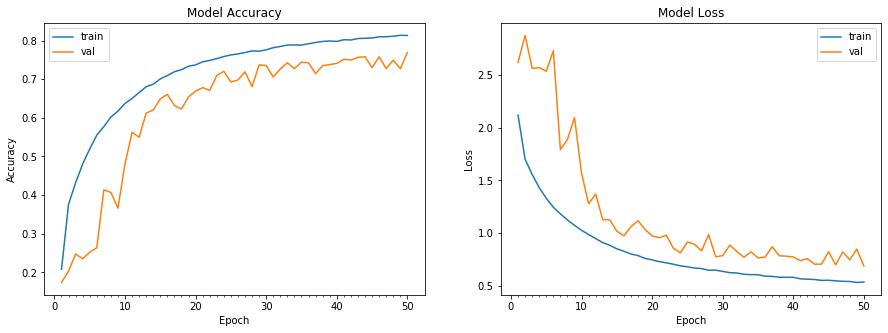

Accuracy on test data is: 76.86


In [101]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Breaking separableconv2d into two operations and adding batchnorm in between made worse. My highest validation accuracy didn't go beyound 0.77 and highest train accuracy didn't go beyond 0.82. This is not as expected but may be due to high regularization. There are double droput layers in addition to double batchnorm layers. 

## Keep same number of batchnorm layers but reduce dropout and keep only after 2nd step pf depthwise separable 

In [102]:
# Define the model
model = Sequential()
model.add(DepthwiseConv2D( kernel_size = 3, padding='same', depth_multiplier = 1, activation='relu', input_shape=(32, 32, 3))) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(14, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

###2nd Con Block #####
model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

### 3rd Conv Block ## No padding here
model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:96: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_31 (Depthwi (None, 32, 32, 3)         30        
_________________________________________________________________
batch_normalization_294 (Bat (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 32, 32, 14)        56        
_________________________________________________________________
batch_normalization_295 (Bat (None, 32, 32, 14)        56        
_________________________________________________________________
dropout_284 (Dropout)        (None, 32, 32, 14)        0         
_________________________________________________________________
depthwise_conv2d_32 (Depthwi (None, 32, 32, 14)        140       
_________________________________________________________________
batch_normalization_296 (Bat (None, 32, 32, 14)        56        
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 70s 178ms/step - loss: 2.2150 - acc: 0.1676 - val_loss: 2.8221 - val_acc: 0.1917
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 50s 129ms/step - loss: 1.7282 - acc: 0.3720 - val_loss: 2.1411 - val_acc: 0.2811
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 50s 127ms/step - loss: 1.5021 - acc: 0.4670 - val_loss: 1.8441 - val_acc: 0.3662
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 51s 130ms/step - loss: 1.3553 - acc: 0.5198 - val_loss: 1.5347 - val_acc: 0.4781
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 51s 130ms/step - loss: 1.2446 - acc: 0

Epoch 40/50

Epoch 00040: LearningRateScheduler setting learning rate to 0.0002231977.
390/390 [==============================] - 53s 136ms/step - loss: 0.5114 - acc: 0.8221 - val_loss: 0.6846 - val_acc: 0.7729
Epoch 41/50

Epoch 00041: LearningRateScheduler setting learning rate to 0.0002180233.
390/390 [==============================] - 50s 129ms/step - loss: 0.5000 - acc: 0.8239 - val_loss: 0.6840 - val_acc: 0.7755
Epoch 42/50

Epoch 00042: LearningRateScheduler setting learning rate to 0.0002130833.
390/390 [==============================] - 51s 131ms/step - loss: 0.4987 - acc: 0.8269 - val_loss: 0.7061 - val_acc: 0.7660
Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 0.0002083623.
390/390 [==============================] - 54s 137ms/step - loss: 0.4939 - acc: 0.8294 - val_loss: 0.6730 - val_acc: 0.7791
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 0.0002038459.
390/390 [==============================] - 53s 137ms/step - loss: 0.4

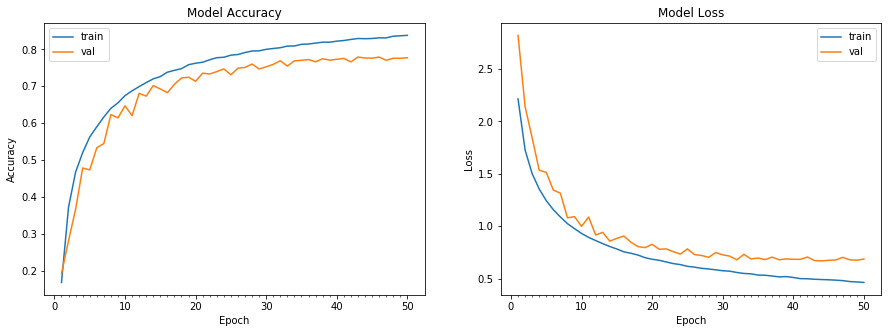

Accuracy on test data is: 77.72


In [104]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [ ]:
# Define the model
model = Sequential()
model.add(DepthwiseConv2D( kernel_size = 3, padding='same', depth_multiplier = 1, activation='relu', input_shape=(32, 32, 3))) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(14, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

###2nd Con Block #####
model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

### 3rd Conv Block ## No padding here
model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  1/390 [..............................] - ETA: 58s - loss: 0.4430 - acc: 0.8672

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


390/390 [==============================] - 52s 133ms/step - loss: 0.7335 - acc: 0.7469 - val_loss: 0.9307 - val_acc: 0.6903
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 52s 134ms/step - loss: 0.6401 - acc: 0.7770 - val_loss: 0.8121 - val_acc: 0.7368
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 52s 134ms/step - loss: 0.5877 - acc: 0.7954 - val_loss: 0.7537 - val_acc: 0.7509
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 53s 135ms/step - loss: 0.5553 - acc: 0.8087 - val_loss: 0.6716 - val_acc: 0.7710
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 53s 135ms/step - loss: 0.5240 - acc: 0.8207 - val_loss: 0.6338 - val_acc: 0.7795
Epoch 6/50

Epoch 00006: LearningRat

390/390 [==============================] - 51s 131ms/step - loss: 0.2607 - acc: 0.9093 - val_loss: 0.5631 - val_acc: 0.8295
Epoch 41/50

Epoch 00041: LearningRateScheduler setting learning rate to 0.0002180233.
390/390 [==============================] - 51s 131ms/step - loss: 0.2623 - acc: 0.9083 - val_loss: 0.5694 - val_acc: 0.8285
Epoch 42/50

Epoch 00042: LearningRateScheduler setting learning rate to 0.0002130833.
390/390 [==============================] - 51s 131ms/step - loss: 0.2582 - acc: 0.9094 - val_loss: 0.5617 - val_acc: 0.8291
Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 0.0002083623.
390/390 [==============================] - 51s 131ms/step - loss: 0.2578 - acc: 0.9102 - val_loss: 0.5675 - val_acc: 0.8260
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 0.0002038459.
390/390 [==============================] - 51s 131ms/step - loss: 0.2557 - acc: 0.9111 - val_loss: 0.5578 - val_acc: 0.8320
Epoch 45/50

Epoch 00045: Learni

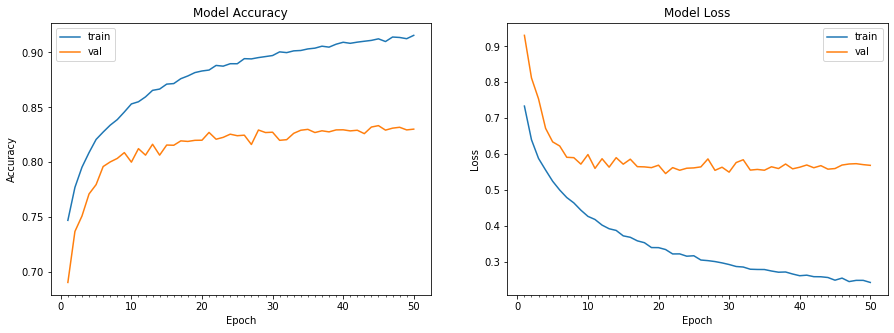

Accuracy on test data is: 83.01


In [105]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  1/390 [..............................] - ETA: 59s - loss: 0.1986 - acc: 0.9375

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


390/390 [==============================] - 52s 134ms/step - loss: 0.5299 - acc: 0.8199 - val_loss: 0.8743 - val_acc: 0.7194
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 53s 135ms/step - loss: 0.4545 - acc: 0.8421 - val_loss: 0.7222 - val_acc: 0.7675
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 53s 135ms/step - loss: 0.4146 - acc: 0.8572 - val_loss: 0.6616 - val_acc: 0.7812
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 53s 135ms/step - loss: 0.3838 - acc: 0.8660 - val_loss: 0.6526 - val_acc: 0.7962
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 54s 137ms/step - loss: 0.3649 - acc: 0.8730 - val_loss: 0.6012 - val_acc: 0.8025
Epoch 6/50

Epoch 00006: LearningRat

390/390 [==============================] - 52s 134ms/step - loss: 0.1812 - acc: 0.9369 - val_loss: 0.5969 - val_acc: 0.8371
Epoch 41/50

Epoch 00041: LearningRateScheduler setting learning rate to 0.0002180233.
390/390 [==============================] - 52s 134ms/step - loss: 0.1790 - acc: 0.9363 - val_loss: 0.5832 - val_acc: 0.8417
Epoch 42/50

Epoch 00042: LearningRateScheduler setting learning rate to 0.0002130833.
390/390 [==============================] - 52s 134ms/step - loss: 0.1788 - acc: 0.9376 - val_loss: 0.5891 - val_acc: 0.8392
Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 0.0002083623.
390/390 [==============================] - 52s 134ms/step - loss: 0.1776 - acc: 0.9374 - val_loss: 0.5884 - val_acc: 0.8402
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 0.0002038459.
390/390 [==============================] - 53s 135ms/step - loss: 0.1719 - acc: 0.9380 - val_loss: 0.5790 - val_acc: 0.8421
Epoch 45/50

Epoch 00045: Learni

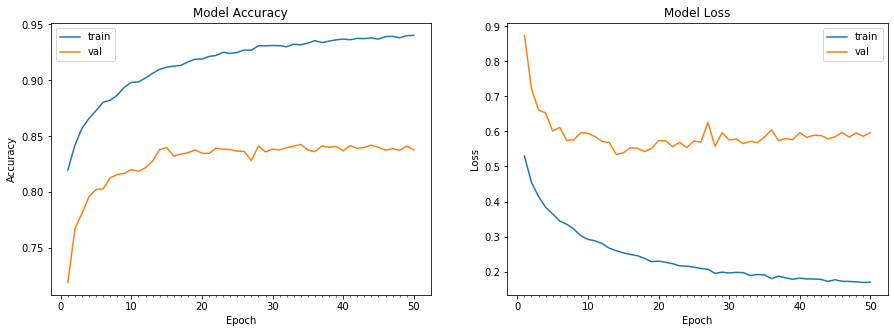

Accuracy on test data is: 83.79


In [106]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Adding Global Average Pooling in the last layer instead of pointwise convolution to see if this increases validation accuracy and convergence

In [110]:
from keras.layers.pooling import GlobalAveragePooling2D

In [113]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 14, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 224, kernel_size = 3, padding='same', activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(filters = 28, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 56, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters = 112, kernel_size = 3, activation='relu', depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`


In [114]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_257 (Separa (None, 32, 32, 14)        83        
_________________________________________________________________
batch_normalization_371 (Bat (None, 32, 32, 14)        56        
_________________________________________________________________
dropout_350 (Dropout)        (None, 32, 32, 14)        0         
_________________________________________________________________
separable_conv2d_258 (Separa (None, 32, 32, 28)        546       
_________________________________________________________________
batch_normalization_372 (Bat (None, 32, 32, 28)        112       
_________________________________________________________________
dropout_351 (Dropout)        (None, 32, 32, 28)        0         
_________________________________________________________________
separable_conv2d_259 (Separa (None, 32, 32, 56)        1876      
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 84s 216ms/step - loss: 1.5512 - acc: 0.4472 - val_loss: 2.0603 - val_acc: 0.4440
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 42s 108ms/step - loss: 1.0991 - acc: 0.6196 - val_loss: 1.3173 - val_acc: 0.5842
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 42s 109ms/step - loss: 0.9256 - acc: 0.6833 - val_loss: 0.8776 - val_acc: 0.7037
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 42s 109ms/step - loss: 0.8245 - acc: 0.7189 - val_loss: 0.8495 - val_acc: 0.7213
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 44s 114ms/step - loss: 0.7551 - acc: 0

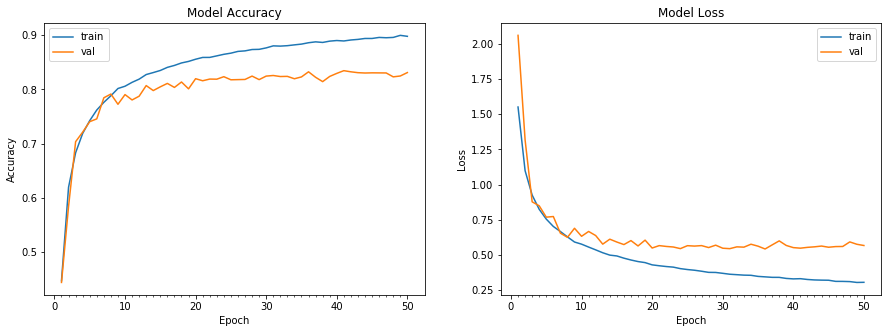

In [115]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy

## Crossed 82.33 in the 24th epoch and highest validation score of 83.47 reached in 41st epoch

In [117]:
# Define the model
model = Sequential()
model.add(DepthwiseConv2D( kernel_size = 3, padding='same', depth_multiplier = 1, activation='relu', input_shape=(32, 32, 3))) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(14, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

###2nd Con Block #####
model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D( kernel_size = 3, padding='same',activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(224, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

### 3rd Conv Block ## No padding here
model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(28, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(56, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D( kernel_size = 3, activation='relu' )) # This only performs 3x3x1 operation across all three channels
#model.add(BatchNormalization())
#model.add(Dropout(0.1)) 
model.add(Convolution2D(112, (1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
#model.add(Convolution2D(10, 2, 2, activation='relu'))
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:94: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`


In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_55 (Depthwi (None, 32, 32, 3)         30        
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 32, 32, 14)        56        
_________________________________________________________________
batch_normalization_397 (Bat (None, 32, 32, 14)        56        
_________________________________________________________________
dropout_376 (Dropout)        (None, 32, 32, 14)        0         
_________________________________________________________________
depthwise_conv2d_56 (Depthwi (None, 32, 32, 14)        140       
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 32, 32, 28)        420       
_________________________________________________________________
batch_normalization_398 (Bat (None, 32, 32, 28)        112       
__________

C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\91911\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 97s 249ms/step - loss: 1.7851 - acc: 0.3506 - val_loss: 2.4130 - val_acc: 0.3471
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 48s 122ms/step - loss: 1.3758 - acc: 0.5126 - val_loss: 1.4630 - val_acc: 0.5013
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 48s 124ms/step - loss: 1.1716 - acc: 0.5893 - val_loss: 1.1213 - val_acc: 0.6106
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 53s 136ms/step - loss: 1.0399 - acc: 0.6373 - val_loss: 1.1200 - val_acc: 0.6128
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 55s 140ms/step - loss: 0.9473 - acc: 0

Epoch 40/50

Epoch 00040: LearningRateScheduler setting learning rate to 0.0002231977.
390/390 [==============================] - 50s 129ms/step - loss: 0.4218 - acc: 0.8578 - val_loss: 0.5695 - val_acc: 0.8165
Epoch 41/50

Epoch 00041: LearningRateScheduler setting learning rate to 0.0002180233.
390/390 [==============================] - 47s 122ms/step - loss: 0.4205 - acc: 0.8586 - val_loss: 0.6209 - val_acc: 0.8007
Epoch 42/50

Epoch 00042: LearningRateScheduler setting learning rate to 0.0002130833.
390/390 [==============================] - 47s 122ms/step - loss: 0.4167 - acc: 0.8594 - val_loss: 0.5918 - val_acc: 0.8105
Epoch 43/50

Epoch 00043: LearningRateScheduler setting learning rate to 0.0002083623.
390/390 [==============================] - 46s 118ms/step - loss: 0.4100 - acc: 0.8628 - val_loss: 0.6041 - val_acc: 0.8015
Epoch 44/50

Epoch 00044: LearningRateScheduler setting learning rate to 0.0002038459.
390/390 [==============================] - 48s 124ms/step - loss: 0.4

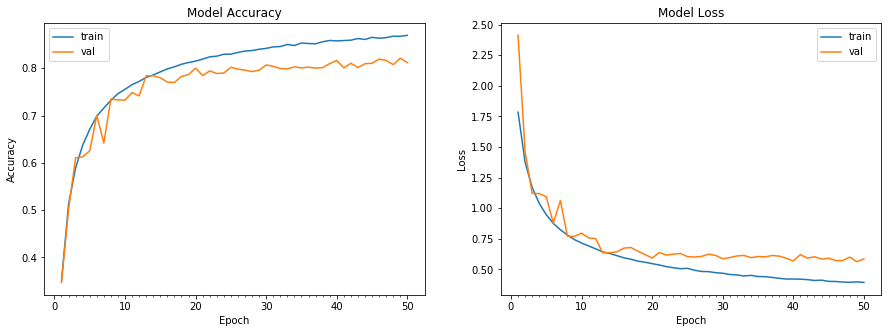

In [119]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)], #Added Rohan's Learning rate scheduler
                                 validation_data = (test_features, test_labels), verbose=1)

                                            
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy